In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools
import scipy.optimize as opt
import pandas as pd
%matplotlib inline

#  Statistical Theory, code assignment 

#  Agai Maor and B.Y.

# Assignment 1

In [2]:
def random_pareto(n=1000):
    """this function creates an n-sized pareto disributed array"""
    arr=(np.random.pareto(7, 1000) + 1) * 5
    return arr

<AxesSubplot:ylabel='Count'>

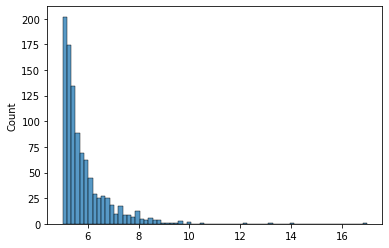

In [3]:
np.random.seed(0)
arr=random_pareto()
sns.histplot(arr)

# Assignment 2

In [4]:
def single_sample_likelihood(x,a,xm=5):
    """this function calculates the pareto pdf for a given x,a variables"""
    return (a*(xm**a))/(x**(a+1))  
single_sample_likelihood_vec=np.vectorize(single_sample_likelihood) #using numpy vectorization for increased preformence

In [5]:
def total_log_likelihood(a,array,n=1000):
    """this method using the single sample likelihood function to calculate the likelihood of an entire given array"""
    arr=single_sample_likelihood_vec(array,a)
    return np.log(arr[arr!=0]).sum()                           #since the log likelihood is the sum of log of the pdf's of multiple x's 
total_log_likelihood_vec=np.vectorize(total_log_likelihood)#using numpy vectorization for increased preformence

# Assignment 3

In [6]:
#at first we used the method below to aprroximate the maximum a-MLE which genrates 
#random uniformly disributed a's and find the argmax that gives the maximum likelihood
#however, in the final results it preformed poorly so we changed it to an optimization approach

#def max_log_likelihood_estimation(n=1000):
#    """"""this function calculates the maximum log likeihood""""""
#    alphas=np.random.uniform(0,10,30)                           #generating random alphas array
#    randar=(np.random.pareto(7, n) + 1) * 5                      #generating xsample points
#    y=np.array([total_log_likelihood(i,randar) for i in alphas])#evaluate the likelihood for every a in the array
#    arg=np.argmax(y)                                            #find the position that gives the maximum likelihood 
#    return alphas[arg],y[arg]

In [7]:
#the function below finds the value for a that maximizes the value of the log likelihood
def max_log_likelihood_estimation(n=1000):
    randar=(np.random.pareto(7, n) + 1) * 5                      #generating sample points
    max_x = opt.fminbound(lambda x: -total_log_likelihood(x,randar), 0, 10)#using optimizer to find the x (a) that maximizes the likelihood
    return max_x ,total_log_likelihood(max_x,randar)

In [8]:
#np.random.seed(0)
x,y=max_log_likelihood_estimation()
x

6.566291187279322

<AxesSubplot:>

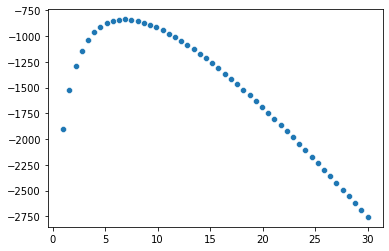

In [9]:
#plotting the log likelihood function
randar=(np.random.pareto(7, 1000) + 1) * 5
x=np.linspace(1,30,50)
y=np.array([total_log_likelihood(i,randar)for i in x])
sns.scatterplot(x=x,y=y)

# Assignment 4

In [10]:
def generate_MLEs(n=10000):
    """this method preforms 10K a-MLE for the pareto distribution"""
    aMLE_arr=np.array([max_log_likelihood_estimation()[0] for _ in itertools.repeat(None,n)])
    return aMLE_arr

7.007648337305143


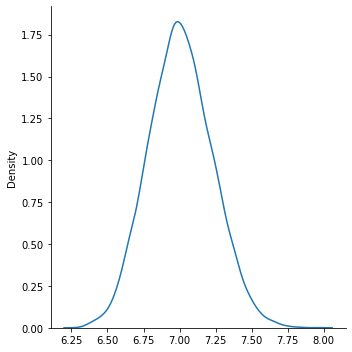

In [11]:
amle_array=generate_MLEs()
sns.displot(x=amle_array,kind="kde")
print(amle_array.mean())

In [12]:
def confidence_interval95():
    arr = (np.random.pareto(7, 10000) + 1) * 5
    log_s= np.log(arr / 5).sum()                                                                    #where the log_s is chi2 disributed
    return (stats.chi2.ppf(0.05/2,2*10000)/(2*log_s)),(stats.chi2.ppf(1-(0.05/2),2*10000)/(2*log_s)) 

In [13]:
conf_int95 =[confidence_interval95() for _ in range(100)]    
#conf_int95                                               #uncomment to print intervals

In [14]:
def confidence_interval99():
    arr = (np.random.pareto(7, 10000) + 1) * 5
    log_s= np.log(arr / 5).sum()                                                                    #where the log_s is chi2 disributed
    return (stats.chi2.ppf(0.01/2,2*10000)/(2*log_s)),(stats.chi2.ppf(1-(0.01/2),2*10000)/(2*log_s)) 

In [15]:
conf_int99 =[confidence_interval99() for _ in range(100)]    
#conf_int99                                               #uncomment to print intervals

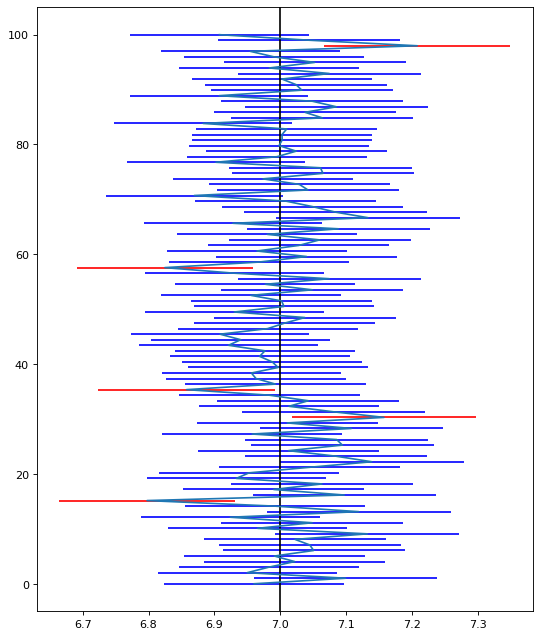

In [16]:
plt.figure(figsize=(8, 10), dpi=80)
CI95df=pd.DataFrame(conf_int95,columns=["Low","High"])
CI95df["Include Alpha"]=(CI95df["Low"]<7)&(CI95df["High"]>7)
CI95df["Error"]=(CI95df["High"]-CI95df["Low"])/2                       #in order to plot interval we plot simetrical distances across the interval mean
CI95df["Mean"]=(CI95df["High"]+CI95df["Low"])/2
CI95df["Color"]= np.where(CI95df['Include Alpha']==True, 'blue', 'red')
plt.errorbar(x=CI95df["Mean"],y=np.linspace(0,100,100),xerr=CI95df["Error"],ecolor=CI95df["Color"])
plt.axvline(x = 7, color = 'black', linestyle = '-')

we can clearly see from the plot above that out of 100 interval 5 does not include the true alpha value

this matching our need for 0.95 confidence interval

# Assignment 5

looking at the expected value formula of the pareto distribution we can see it gets infinate values for some a values
and finite for others

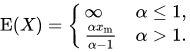

In [17]:
#since a=1.1>1 we will calculate it for this value
1.1*5/(1.1-1)

54.99999999999995

In [24]:
a=1.1                               #setting alpha to 1.1
N=[1,100,10000,1000000,100000000]
sample_count=100
data=pd.DataFrame()
for sample_size in N:
    temp_array=[]
    for i in range(sample_count):
        arr=(np.random.pareto(a, sample_size) + 1) * 5
        temp_array.append(arr.sum()/len(arr))
    data[sample_size]=pd.Series(temp_array)
data.head()

,1,100,10000,1000000,100000000
0,5.703207,24.717285,39.869497,41.941318,83.671720
1,50.087092,41.522579,128.840224,77.591554,44.455823
2,7.197584,20.128553,29.353688,39.449666,44.460974
3,5.611786,23.029836,28.551899,42.862755,44.019281
4,14.581717,15.640893,27.376080,39.448676,44.538553


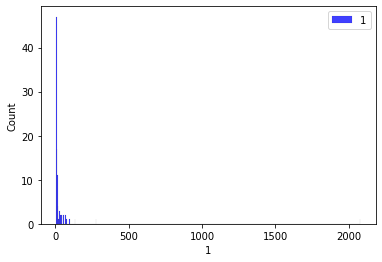

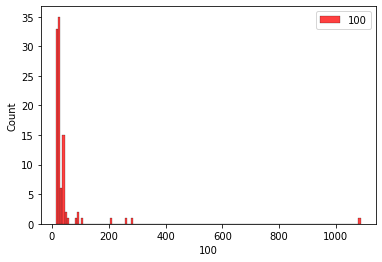

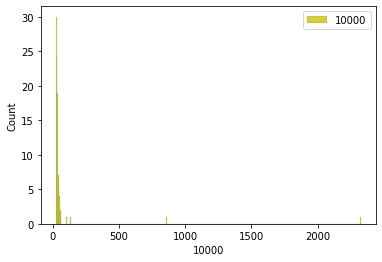

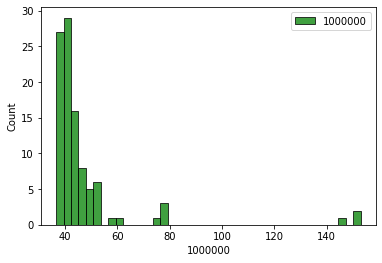

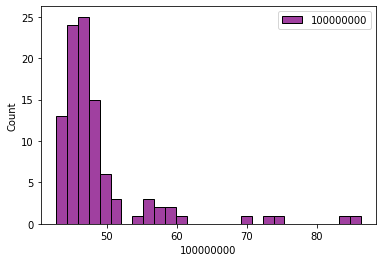

In [29]:
colors=["b","r","y","g","purple"]
for i in range(len(data.columns)):
    plt.figure()                                                            #uncomment in order to plot histograms seperately   
    sns.histplot(data[data.columns[i]], label=data.columns[i],color=colors[i])
    plt.legend()
plt.show()

we can see from the chart above that as the sample size grows, the distribution is more concentrated around the calculated value of the expected value
but of course not normaly disributed

now a=0.9<1 hence, the expected value is infinity

In [20]:
a=0.9                             #setting alpha to 1.1
N=[1,100,10000,1000000,100000000]
sample_count=100
data2=pd.DataFrame()              
for sample_size in N:
    temp_array=[]
    for i in range(sample_count):
        arr=(np.random.pareto(a, sample_size) + 1) * 5
        temp_array.append(arr.sum()/len(arr))
    data2[sample_size]=pd.Series(temp_array)
data2.head()

,1,100,10000,1000000,100000000
0,38.309140,169.607767,68.707860,152.030550,427.478382
1,9.115598,25.462576,77.651768,670.864509,253.403650
2,13.152541,45.377348,97.056603,191.998035,683.770073
3,21.737573,44.987801,144.107616,240.389248,334.142731
4,5.402738,51.105287,133.799114,249.430560,14022.230568


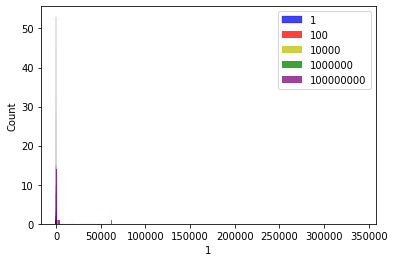

In [27]:
colors=["b","r","y","g","purple"]
for i in range(len(data2.columns)):
    #plt.figure()                                                            #uncomment in order to plot histograms seperately   
    sns.histplot(data2[data2.columns[i]], label=data2.columns[i],color=colors[i])
    plt.legend()
plt.show()

as expected, the distributions does note concentrate around a specific value but varies more